In [51]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv')
train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,record_id
0,15000.0,36 months,11.99,498.15,B,B3,Quality Assurance Specialist,4 years,MORTGAGE,70000.0,...,32.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,295215.0,20500.0,453246940
1,3725.0,36 months,6.03,113.38,A,A1,NaN,NaN,MORTGAGE,52260.0,...,9.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,25130.0,14200.0,453313687
2,16000.0,36 months,11.14,524.89,B,B2,KIPP NYC,3 years,RENT,67500.0,...,22.0,f,0.0,1.0,INDIVIDUAL,0.0,193.0,41737.0,19448.0,453283543
3,4200.0,36 months,13.33,142.19,C,C3,Receptionist,< 1 year,MORTGAGE,21600.0,...,19.0,w,0.0,1.0,INDIVIDUAL,0.0,165.0,28187.0,14500.0,453447199
4,6500.0,36 months,12.69,218.05,B,B5,Medtox Laboratories,10+ years,RENT,41000.0,...,12.0,f,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,453350283


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200189 entries, 0 to 200188
Data columns (total 36 columns):
loan_amnt                     200189 non-null float64
term                          200189 non-null object
int_rate                      200189 non-null float64
installment                   200189 non-null float64
grade                         200189 non-null object
sub_grade                     200189 non-null object
emp_title                     189062 non-null object
emp_length                    192135 non-null object
home_ownership                200189 non-null object
annual_inc                    200189 non-null float64
verification_status           200189 non-null object
issue_d                       200189 non-null object
loan_status                   200189 non-null int64
pymnt_plan                    200189 non-null object
purpose                       200189 non-null object
zip_code                      200189 non-null object
addr_state                    200189 n

In [4]:
def Nan_killer(x, num = -999):
    x['revol_util'] = x['revol_util'].fillna(num)
  #  x['tot_coll_amt'] = x['tot_coll_amt'].fillna(num)
    x['tot_cur_bal'] =  x['tot_cur_bal'].fillna(num)
    x['total_rev_hi_lim'] =  x['total_rev_hi_lim'].fillna(num)
    

In [5]:
def proc(x,y):
  #  x['home_ownership'] = x['home_ownership'].astype(str).map(lambda x: 'OTHER' if x in ['NONE', 'ANY'] else x)
  #  x['purpose'] = x['purpose'].astype(str).map(lambda x: 'other' if x in ['educational', 'renewable_energy','vacation','house','wedding','moving','medical','car','small_business','major_purchase'] else x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
    x_test['sub_grade'] = x_test['sub_grade'].astype('str').map(lambda x: ord(x[0])*10 + int(x[1]))
    x_train['sub_grade'] = x_train['sub_grade'].astype('str').map(lambda x: ord(x[0])*10 + int(x[1]))
    x_train = pd.get_dummies(x_train, columns = ['purpose','home_ownership','term','verification_status'])   # OHE (?????)
    x_test = pd.get_dummies(x_test, columns = ['purpose','home_ownership','term','verification_status'])
    for i in list(x_test): # удаление из тестовых данных столбцов, если их не было в тренировочных
        if i not in list(x_train):
            list(my_dataframe)
            x_test.drop(i, axis=1, inplace=True)
    for i in list(x_train): # добавление колонки с нулями, если такой нет в тестовой
        if i not in list(x_test):
            x_test[i] = 0
    

    x_test = x_test.reindex(sorted(x_test.columns), axis=1)
    x_train = x_train.reindex(sorted(x_test.columns), axis=1)
    return x_train, x_test, y_train, y_test

In [41]:
x =  train.loc[:,['int_rate','sub_grade']]

In [42]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200189 entries, 0 to 200188
Data columns (total 2 columns):
int_rate     200189 non-null float64
sub_grade    200189 non-null object
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


In [69]:
x['sub_grade'] = x['sub_grade'].astype('str').map(lambda x: (ord(x[0])*10 + int(x[1]))/100)

In [70]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200189 entries, 0 to 200188
Data columns (total 2 columns):
int_rate     200189 non-null float64
sub_grade    200189 non-null float64
dtypes: float64(2)
memory usage: 3.1 MB


In [71]:
from sklearn.cluster import KMeans

In [72]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)

In [73]:
kmeans.labels_

array([1, 0, 0, ..., 1, 2, 2])

In [74]:
y_kmeans = kmeans.fit_predict(x)

In [75]:
kmeans.cluster_centers_

array([[ 8.78773451,  5.45457281],
       [13.94371241,  5.46767705],
       [19.800232  ,  5.48614181]])

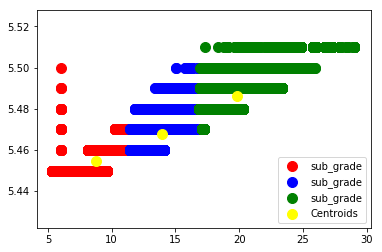

In [77]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0]['int_rate'], x[y_kmeans == 0]['sub_grade'], s = 100, c = 'red')
plt.scatter(x[y_kmeans == 1]['int_rate'], x[y_kmeans == 1]['sub_grade'], s = 100, c = 'blue')
plt.scatter(x[y_kmeans == 2]['int_rate'], x[y_kmeans == 2]['sub_grade'], s = 100, c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()